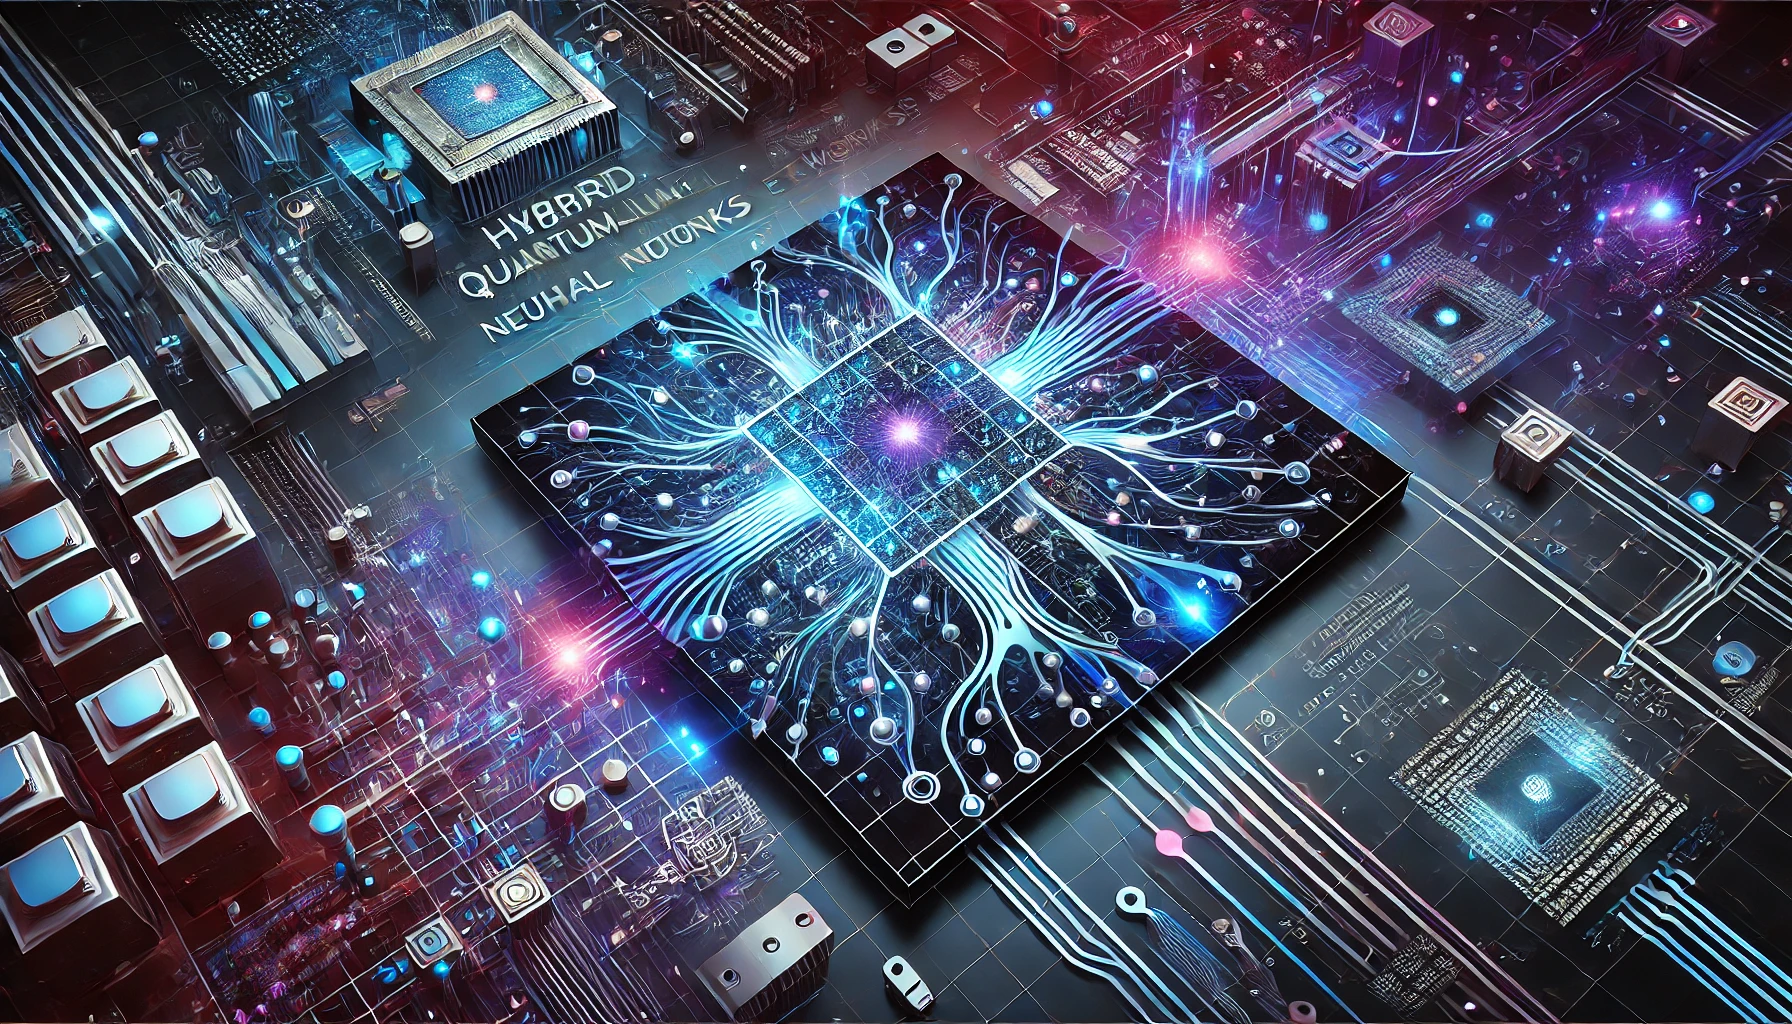

# Problem Statement

With the advent of quantum computing, there is a growing interest in leveraging quantum algorithms to enhance classical machine learning models. However, integrating quantum neural networks (QNNs) with established deep learning frameworks like PyTorch poses a significant challenge due to the inherent differences between quantum and classical computing paradigms. This project aims to explore the integration of quantum neural networks into classical machine learning workflows, enabling the development of hybrid quantum-classical models that can be trained and evaluated using traditional machine learning tools.

# Objectives

1. **Introduce and Demonstrate `TorchConnector`:**
   - Provide a detailed introduction to the `TorchConnector` class in Qiskit, explaining its role in bridging quantum and classical machine learning.
   - Demonstrate how to use `TorchConnector` to integrate QNNs into PyTorch workflows seamlessly.

2. **Build and Train Hybrid Quantum-Classical Models:**
   - Develop simple quantum neural networks using Qiskit's `EstimatorQNN` and `SamplerQNN`.
   - Train these QNNs on classification and regression tasks using PyTorch's automatic differentiation engine.

3. **Apply Hybrid Models to Complex Tasks:**
   - Extend the use of hybrid quantum-classical models to more complex tasks, such as image classification on the MNIST dataset.
   - Compare the performance and training convergence of hybrid models against classical models.

4. **Provide Insights and Visualizations:**
   - Visualize the training process, loss convergence, and model predictions to help users understand the behavior and performance of hybrid models.
   - Discuss the implications of integrating quantum computing with classical machine learning.

# Impacts

1. **Advancing Quantum Machine Learning:**
   - The project contributes to the growing field of quantum machine learning by demonstrating practical applications of hybrid quantum-classical models, which could potentially offer advantages in solving specific types of problems more efficiently.

2. **Facilitating Hybrid Model Development:**
   - By providing a clear framework for integrating QNNs with PyTorch, this project makes it easier for researchers and practitioners to experiment with and develop hybrid models, accelerating the adoption of quantum computing in machine learning.

3. **Educational Value:**
   - The project serves as a valuable educational resource, helping users understand the concepts and practicalities of hybrid quantum-classical models. This can inspire further research and development in the field.

# Approach

1. **Initial Setup:**
   - Install necessary libraries and set up the environment to work with Qiskit and PyTorch.
   - Import essential modules for quantum circuit creation, neural network construction, and data handling.

2. **Develop Quantum Neural Networks:**
   - Construct simple quantum neural networks using Qiskit’s `EstimatorQNN` and `SamplerQNN`.
   - Integrate these QNNs into PyTorch using `TorchConnector`.

3. **Train and Evaluate Models:**
   - Train the QNNs on simple classification and regression tasks using PyTorch's automatic differentiation engine.
   - Apply the trained models to more complex tasks, such as MNIST image classification, by embedding QNNs into a larger neural network architecture.

4. **Visualize and Analyze Results:**
   - Generate plots to visualize the training loss, model predictions, and decision boundaries.
   - Analyze the performance of the hybrid models compared to classical models.

5. **Discussion and Conclusion:**
   - Discuss the outcomes, highlighting the strengths and limitations of hybrid quantum-classical models.
   - Provide suggestions for future research directions and potential improvements in integrating quantum and classical machine learning.

This project provides an introduction to the `TorchConnector` class in Qiskit, illustrating its functionality and how it facilitates a seamless integration of any `NeuralNetwork` from Qiskit Machine Learning into a PyTorch workflow. The `TorchConnector` bridges the gap between quantum and classical machine learning by taking a Qiskit `NeuralNetwork` and transforming it into a PyTorch `Module`. This transformation allows the resulting module to be effortlessly incorporated into existing PyTorch architectures, enabling joint training with classical components without requiring any additional adjustments. This capability opens the door for the development and experimentation of innovative **hybrid quantum-classical** machine learning models.

[Part 1: Simple Classification & Regression](#Part-1:-Simple-Classification-&-Regression)

The first part of this project demonstrates how quantum neural networks can be trained using PyTorch's automatic differentiation engine (`torch.autograd`, [link](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)) for straightforward classification and regression tasks.

1. [Classification](#1.-Classification)
    1. Classification with PyTorch and `EstimatorQNN`
    2. Classification with PyTorch and `SamplerQNN`
2. [Regression](#2.-Regression)
    1. Regression with PyTorch and `SamplerQNN`

[Part 2: MNIST Classification, Hybrid QNNs](#Part-2:-MNIST-Classification,-Hybrid-QNNs)

The second part of this project illustrates how to embed a (Quantum) `NeuralNetwork` into a target PyTorch workflow (in this case, a typical CNN architecture) to classify MNIST data in a hybrid quantum-classical manner.

# Initial Setup

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_machine_learning

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 35.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit.utils import algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 0

# Part 1: Simple Classification & Regression

## 1. Classification

First, we will demonstrate how the `TorchConnector` enables the training of a Quantum `NeuralNetwork` for solving classification tasks using PyTorch's automatic differentiation engine. To effectively illustrate this capability, we will conduct a **binary classification** experiment on a dataset that has been randomly generated. Through this example, you will see how `TorchConnector` seamlessly integrates quantum neural networks into the PyTorch framework, allowing them to be trained just like any other classical model within PyTorch’s environment.

### Generate random dataset

#### Select dataset dimension (num_inputs) and size (num_samples)

In [ ]:
num_inputs = 2
num_samples = 20

#### Generate random input coordinates (X) and binary labels (y)

In [ ]:
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}, y01 will be used for SamplerQNN example
y = 2 * y01 - 1  # in {-1, +1}, y will be used for EstimatorQNN example

#### Convert to torch Tensors

In [ ]:
X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

#### Plot dataset

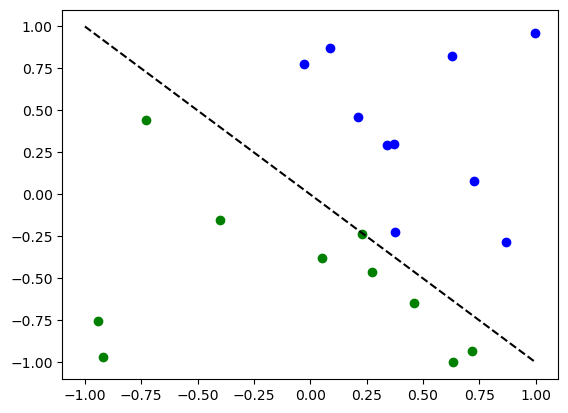

In [ ]:
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

This plot represents a binary classification problem where data points are classified into two categories based on their positions relative to a decision boundary.

- **Data Points**: The plot shows two sets of data points:
  - **Blue dots**: Represent one class.
  - **Green dots**: Represent another class.

- **Decision Boundary**: The dashed black line in the plot represents the decision boundary or separating line. This line is typically derived from a classifier (such as a linear classifier) that attempts to separate the two classes.

- **Classification**:
  - Points above the decision boundary are classified into one class (blue dots).
  - Points below the decision boundary are classified into the other class (green dots).

The goal of this classifier is to correctly separate the two classes with this boundary. The plot visually demonstrates how well the decision boundary is able to segregate the classes based on the given data points.

In this example, the classification appears fairly clean, with most points correctly classified on either side of the boundary, although there might be a few misclassifications or points very close to the boundary that could be classified differently depending on the model's parameters.

### A. Classification with PyTorch and  `EstimatorQNN`

Connecting an `EstimatorQNN` to PyTorch is a relatively simple process. In this section, we will demonstrate how this can be done by utilizing an `EstimatorQNN` that is built from a combination of a feature map and an ansatz. This example will clearly show how easy it is to integrate quantum neural networks with PyTorch, making it possible to leverage PyTorch’s powerful tools for training and evaluation within a quantum machine learning framework. By constructing the `EstimatorQNN` from a feature map and an ansatz, we can effectively harness the strengths of both quantum and classical machine learning techniques.

#### Circuit and ZZ Feature Map

In [ ]:
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs)

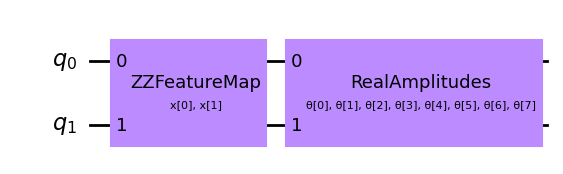

In [ ]:
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw("mpl")

This diagram represents a quantum circuit in Qiskit that has been constructed by combining a feature map and an ansatz.

***Breakdown of the Circuit***

1. **Quantum Circuit Initialization (`qc = QuantumCircuit(num_inputs)`):**
   - This command initializes a quantum circuit `qc` with a number of qubits equal to `num_inputs`.

2. **ZZFeatureMap:**
   - The first block in the diagram is labeled "ZZFeatureMap."
   - A feature map is typically used in quantum machine learning to encode classical data into the quantum state.
   - The `ZZFeatureMap` is a specific type of feature map that applies rotations based on the input data `x[0], x[1]` and entangles the qubits using ZZ interactions, which are controlled-Z operations.

3. **RealAmplitudes:**
   - The second block in the diagram is labeled "RealAmplitudes."
   - This block represents an ansatz, which is a parameterized quantum circuit used to explore the space of possible quantum states.
   - The `RealAmplitudes` ansatz is a common choice for variational algorithms. It applies rotations (typically Rx and Rz gates) to the qubits, parameterized by the angles `θ[0], θ[1], ... θ[7]`, and is often used in variational quantum algorithms to approximate a solution to a problem.

4. **Circuit Composition:**
   - The `qc.compose(feature_map, inplace=True)` and `qc.compose(ansatz, inplace=True)` commands indicate that the feature map and ansatz are being sequentially composed into the quantum circuit `qc`.
   - The `inplace=True` argument ensures that these operations are applied directly to the existing circuit without creating a new one.

5. **Visualization (`qc.draw("mpl")`):**
   - The `qc.draw("mpl")` command is used to visualize the quantum circuit. The circuit is rendered using the Matplotlib backend, which produces the diagram shown.

***Purpose***

The combined quantum circuit depicted in this diagram is likely part of a quantum machine learning or variational quantum algorithm. The feature map encodes classical data into the quantum circuit, and the ansatz is used to manipulate the quantum states to perform tasks such as classification or regression by training the parameters `θ` to minimize a certain cost function.

#### Setup QNN

In [ ]:
qnn1 = EstimatorQNN(circuit=qc,
                    input_params=feature_map.parameters,
                    weight_params=ansatz.parameters)

#### Set up PyTorch module
Note: If we don't explicitly declare the initial weights they are chosen uniformly at random from [-1, 1].

In [ ]:
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn1.num_weights) - 1)
model1 = TorchConnector(qnn1, initial_weights=initial_weights)
print("Initial weights: ", initial_weights)

Initial weights:  [ 0.01430597 -0.03562612  0.01886001 -0.03241775 -0.0216762   0.07805487
 -0.05456848  0.02463743]


### Test with a Single Input

In [ ]:
model1(X_[0, :])

tensor([-0.1160], grad_fn=<_TorchNNFunctionBackward>)

### Optimizer and Loss Function

***Optimizer***

The choice of optimizer plays a critical role in training any machine learning model, as it can significantly impact the success and efficiency of the training process. When we utilize the `TorchConnector`, we gain access to the full range of optimizer algorithms available in the [`torch.optim`] package ([link](https://pytorch.org/docs/stable/optim.html)). This package includes some of the most widely recognized and commonly used optimization algorithms in popular machine learning architectures, such as *Adam*, *SGD*, and *Adagrad*. These optimizers are well-known for their effectiveness in various contexts. However, for the purposes of this project, we will focus on using the L-BFGS algorithm (`torch.optim.LBFGS`). L-BFGS is one of the most well-known second-order optimization algorithms, specifically designed for numerical optimization, and is particularly useful in scenarios where precise and efficient convergence is desired. This choice will help demonstrate the integration of advanced optimization techniques within a quantum-classical hybrid framework.

***Loss Function***

Regarding the loss function, we can similarly benefit from PyTorch's extensive collection of pre-defined modules available in `torch.nn`. This includes widely used loss functions like [Cross-Entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) and [Mean Squared Error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html). These loss functions are essential components in training machine learning models, helping to quantify the difference between predicted outputs and actual targets. By leveraging these pre-built modules, we can efficiently integrate robust loss functions into our quantum-classical hybrid models, ensuring that our training process is both effective and aligned with standard machine learning practices.


***Clarification***

In classical machine learning, it is generally recommended to use Cross-Entropy loss for classification tasks and Mean Squared Error (MSE) loss for regression tasks. This guideline is based on the assumption that the output of the classification network represents class probability values within the $[0, 1]$ range, which is typically achieved by incorporating a Softmax layer. However, in the example involving `EstimatorQNN`, there is no such Softmax layer or any mapping applied to the output. As a result, the Quantum Neural Network (QNN) output can take any value within the range of $[-1, 1]$. This is why, in this particular case, MSELoss is used for the classification task, even though it is not the standard practice. We encourage you to experiment with different loss functions to observe how they might affect the training outcomes and potentially discover alternative approaches that suit your specific model architecture.

#### Define the Optimizer and Loss

In [ ]:
optimizer = LBFGS(model1.parameters())
f_loss = MSELoss(reduction="sum")

### Model Training

In [ ]:
model1.train()  # set model to training mode

TorchConnector()

Note from (https://pytorch.org/docs/stable/optim.html): Some optimization algorithms such as LBFGS need to reevaluate the function multiple times, so you have to pass in a closure that allows them to recompute your model. The closure should clear the gradients, compute the loss, and return it.

In [ ]:
def closure():
    optimizer.zero_grad()  # Initialize/clear gradients

    loss = f_loss(model1(X_), y_)  # Evaluate loss function
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss

    return loss

### Run the Optimizer

In [ ]:
optimizer.step(closure)

29.12506866455078
20.906461715698242
19.499727249145508
15.441910743713379
15.152021408081055
14.831969261169434
30.914098739624023
22.105876922607422
23.029150009155273
21.771160125732422
21.379077911376953
24.94393539428711
35.54460144042969
15.448237419128418
31.260616302490234
25.056447982788086
23.482545852661133
19.925676345825195
25.445438385009766
20.366535186767578


tensor(29.1251, grad_fn=<MseLossBackward0>)

### Evaluate the Model and Compute Accuracy

In [ ]:
y_predict = []

for x, y_target in zip(X, y):
    output = model1(Tensor(x))
    y_predict += [np.sign(output.detach().numpy())[0]]

print("Accuracy:", sum(y_predict == y) / len(y))

Accuracy: 0.65


### Plot the Results

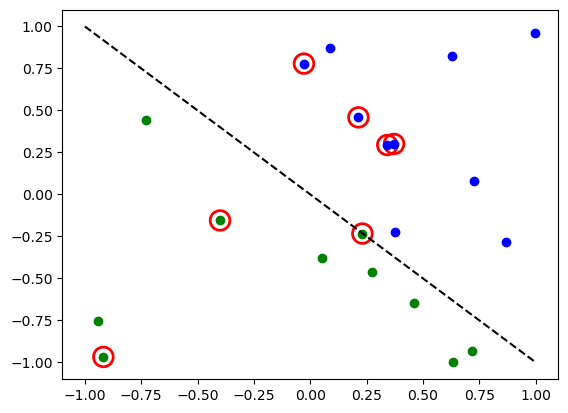

In [ ]:
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)

plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

This plot represents a binary classification problem, similar to the one you shared earlier, but with an additional layer of information indicating misclassified points.

***Components of the Plot***

1. **Data Points:**
   - **Blue dots:** Represent data points that belong to one class.
   - **Green dots:** Represent data points that belong to another class.

2. **Decision Boundary:**
   - The dashed black line represents the decision boundary created by a classifier. This boundary is used to separate the two classes in the feature space.

3. **Misclassified Points (Red Circles):**
   - The red circles highlight the points that have been misclassified by the model.
   - **Blue dots with red circles** are data points that actually belong to the blue class but have been classified as green.
   - **Green dots with red circles** are data points that actually belong to the green class but have been classified as blue.

***Interpretation***

- The goal of the classifier is to correctly separate the two classes with the decision boundary. Ideally, all points above the line should be classified as blue, and all points below the line should be classified as green.
- The red circles indicate where the classifier has made errors. These points fall on the wrong side of the decision boundary according to the classifier, meaning they are predicted to be in the incorrect class.
- The plot shows that most points are correctly classified, but there are a few instances where the classifier has failed to distinguish the classes correctly, leading to misclassifications.

This visualization is helpful for understanding the performance of the classifier and identifying where it struggles to separate the data, which can guide further model improvements.

### B. Classification with PyTorch and `SamplerQNN`

Connecting a `SamplerQNN` to PyTorch requires a bit more care compared to linking an `EstimatorQNN`. If not configured correctly, the process of backpropagation will not work.

Specifically, it is crucial to ensure that the network's forward pass returns a dense array of probabilities by setting the `sparse` parameter to `False`. Fortunately, this parameter is set to `False` by default, so you only need to confirm that this setting has not been altered.

**⚠️ Important Notice:**
If you decide to define a custom interpret function (as seen in the example with `parity`), it is essential to explicitly specify the desired output shape (for instance, `2` in the example). Failing to do so may cause issues during the training process. For further details on the initial parameter setup for `SamplerQNN`, please refer to the [official Qiskit documentation](https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.neural_networks.SamplerQNN.html). This resource provides comprehensive information to ensure your setup is correctly configured.

#### Define Feature Map

In [ ]:
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, entanglement="linear", reps=1)

#### Define the Quantum Circuit

In [ ]:
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

#### Define `SamplerQNN`

In [ ]:
parity = lambda x: "{:b}".format(x).count("1") % 2     # optional interpret function
output_shape = 2                                       # parity = 0, 1

qnn2 = SamplerQNN(circuit=qc,
                  input_params=feature_map.parameters,
                  weight_params=ansatz.parameters,
                  interpret=parity,
                  output_shape=output_shape)

#### Set up PyTorch Module

Reminder: If we don't explicitly declare the initial weights they are chosen uniformly at random from [-1, 1].

In [ ]:
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn2.num_weights) - 1)
print("Initial weights: ", initial_weights)
model2 = TorchConnector(qnn2, initial_weights)

Initial weights:  [-0.08319693  0.06652883  0.05741966 -0.05212611]


For a reminder on optimizer and loss function choices, you can go back to [this section](#Optimizer).

#### Define Optimizer and Loss

In [ ]:
optimizer = LBFGS(model2.parameters())
f_loss = CrossEntropyLoss()                 # Our output will be in the [0,1] range

### Model Training

In [ ]:
# Start training
model2.train()

TorchConnector()

#### Define LBFGS Closure Method

In [ ]:
def closure():
    optimizer.zero_grad(set_to_none=True)        # Initialize gradient

    loss = f_loss(model2(X_), y01_)              # Calculate loss
    loss.backward()                              # Backward pass
    print(loss.item())                           # Print loss

    return loss

#### Run Optimizer

In [ ]:
optimizer.step(closure)

0.6632072925567627
0.6493149995803833
0.5930382013320923
0.5903791785240173
0.585241436958313
0.585690438747406
0.5821352601051331
0.5811942219734192
0.5800613760948181
0.5799845457077026
0.5799728631973267
0.5799713730812073
0.5799713730812073


tensor(0.6632, grad_fn=<NllLossBackward0>)

### Evaluate Model and Compute Accuracy

In [ ]:
y_predict = []

for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print("Accuracy:", sum(y_predict == y01) / len(y01))

Accuracy: 0.75


The red circles indicate wrongly classified data points.

## 2. Regression

We utilize a model based on the `EstimatorQNN` to demonstrate how to carry out a regression task as well. In this example, the dataset used is randomly generated to follow a sine wave pattern.

### Generate Random Dataset

In [ ]:
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X) + eps * (2 * algorithm_globals.random.random([num_samples, 1]) - 1)

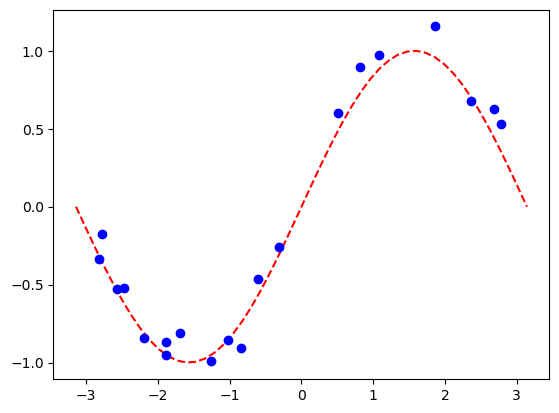

In [ ]:
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")
plt.plot(X, y, "bo")
plt.show()

This plot illustrates a regression analysis where a model is being used to fit a curve to a set of data points.

***Components of the Plot***

1. **Data Points (Blue Dots):**
   - The blue dots represent the actual data points from the dataset. These points seem to follow a sinusoidal pattern, suggesting that the underlying relationship between the independent variable (x-axis) and the dependent variable (y-axis) is likely non-linear.

2. **Fitted Curve (Red Dashed Line):**
   - The red dashed line represents the model's prediction or the fitted curve that the regression model has learned from the data.
   - This curve is intended to approximate the underlying function that generated the data points.

***Interpretation***

- The goal of the regression model is to find a curve that best fits the given data points. The plot shows that the model has successfully captured the general sinusoidal trend of the data, meaning it has likely learned an appropriate mapping from the input features to the target values.
- The red dashed line closely follows the pattern of the blue dots, indicating that the model's predictions are reasonably accurate across the range of data points.
- However, there are slight deviations between the fitted curve and the actual data points, which is expected in real-world scenarios due to noise or model limitations. These differences suggest areas where the model might not perfectly capture the data's underlying trend, but overall, the fit appears to be good.

This plot effectively demonstrates the model's ability to perform regression, particularly in cases where the relationship between variables is non-linear, like a sine wave.

### A. Regression with PyTorch and `EstimatorQNN`

The definition of the network and the training loop for this regression task will closely resemble those used in the classification task with `EstimatorQNN`. However, in this scenario, we will take a slightly different approach by defining our own custom feature map and ansatz. This variation allows us to explore the flexibility of the Qiskit framework and experiment with different quantum circuit configurations. By customizing these components, we can tailor the network to better suit the specific characteristics of the regression problem at hand, potentially improving the model's performance. This approach also offers an opportunity to gain deeper insights into how different feature maps and ansätze impact the overall training process and outcomes in quantum machine learning tasks.

#### Connstruct Simple Feature Map

In [ ]:
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

#### Quantum Circuit

In [ ]:
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

#### Construct QNN

In [ ]:
qnn3 = EstimatorQNN(circuit=qc,
                    input_params=[param_x],
                    weight_params=[param_y])

#### Set up PyTorch Module

Reminder: If we don't explicitly declare the initial weights they are chosen uniformly at random from [-1, 1].

In [ ]:
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn3.num_weights) - 1)
model3 = TorchConnector(qnn3, initial_weights)

For a reminder on optimizer and loss function choices, you can go back to [this section](#Optimizer).

#### Define Optimizer and Loss Function

In [ ]:
optimizer = LBFGS(model3.parameters())
f_loss = MSELoss(reduction="sum")

#### Model Training

In [ ]:
model3.train()                                   # set model to training mode

TorchConnector()

#### Define Objective Function

In [ ]:
def closure():
    optimizer.zero_grad(set_to_none=True)           # Initialize gradient

    loss = f_loss(model3(Tensor(X)), Tensor(y))     # Compute batch loss
    loss.backward()                                 # Backward pass
    print(loss.item())                              # Print loss

    return loss

#### Run optimizer

In [ ]:
optimizer.step(closure)

18.421794891357422
2.760133981704712
2.1470742225646973
0.2681902348995209
0.26321324706077576
0.26321256160736084


tensor(18.4218, grad_fn=<MseLossBackward0>)

#### Plot the Target Function

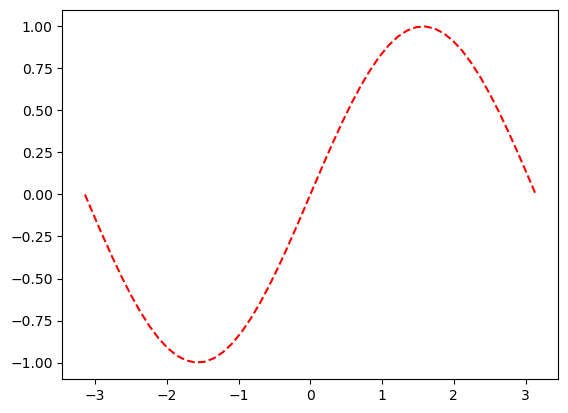

In [ ]:
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")

#### Plot the Data

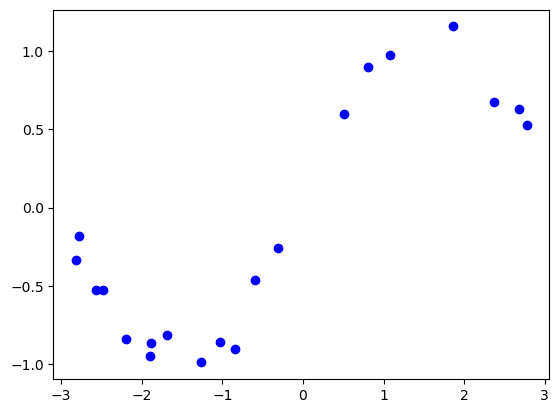

In [ ]:
plt.plot(X, y, "bo")

#### Plot the Fitted Line

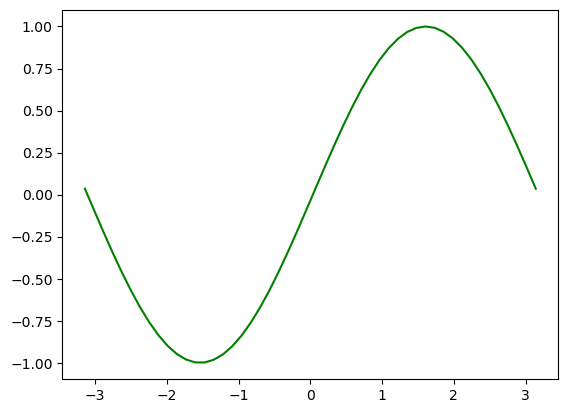

In [ ]:
y_ = []

for x in np.linspace(lb, ub):
    output = model3(Tensor([x]))
    y_ += [output.detach().numpy()[0]]
plt.plot(np.linspace(lb, ub), y_, "g-")
plt.show()

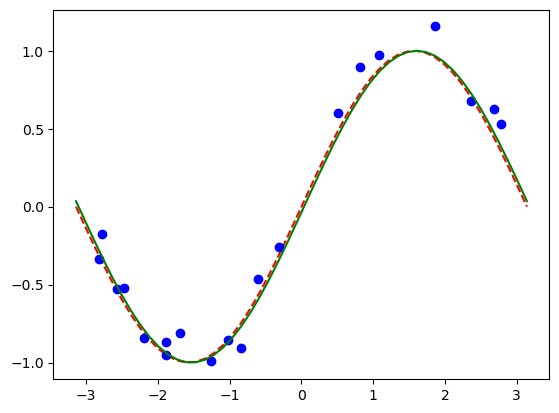

In [ ]:
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")

plt.plot(X, y, "bo")

y_ = []

for x in np.linspace(lb, ub):
    output = model3(Tensor([x]))
    y_ += [output.detach().numpy()[0]]

plt.plot(np.linspace(lb, ub), y_, "g-")
plt.show()

This plot illustrates a comparison between two regression models or curves that have been fitted to the same set of data points.

***Components of the Plot***

1. **Data Points (Blue Dots):**
   - The blue dots represent the actual data points from the dataset. These points follow a pattern that resembles a sine wave, indicating a non-linear relationship between the input (x-axis) and output (y-axis).

2. **Red Dashed Line:**
   - The red dashed line represents the first regression model’s prediction or the fitted curve. This curve is meant to approximate the underlying function that generated the data points.

3. **Green Line:**
   - The green line represents the second regression model’s prediction or fitted curve. This model also attempts to fit the same underlying function but uses a potentially different method or set of parameters.

***Interpretation***

- Both the red dashed line and the green line are attempts to fit the sinusoidal pattern of the data. The plot shows that both models follow the general trend of the data points fairly well.
- The green line might represent a more refined model or one that better captures the nuances of the data, as it appears to follow the blue dots more closely in some regions compared to the red dashed line.
- The small deviations between the two curves highlight differences in how each model interprets the data. These differences could be due to different algorithms, different degrees of polynomial fitting, or other modeling choices.

Overall, this plot is useful for visually comparing the performance of two different regression models on the same dataset. The closer the lines are to the blue dots, the better the model fits the data. The green line appears to provide a slightly better fit than the red dashed line, suggesting that it may be a more accurate model for this particular dataset.

# Part 2: MNIST Classification, Hybrid QNNs

In this second part, we demonstrate how to utilize a hybrid quantum-classical neural network, integrated through the `TorchConnector`, to tackle a more advanced image classification task using the MNIST handwritten digits dataset. This example showcases the power of combining quantum computing with classical machine learning techniques, allowing us to explore the potential of hybrid models in complex scenarios.

For those interested in a more in-depth explanation of hybrid quantum-classical neural networks, particularly before the introduction of the `TorchConnector`, we recommend checking out the relevant section in the [Qiskit Textbook](https://qiskit.org/textbook/ch-machine-learning/machine-learning-qiskit-pytorch.html). The textbook provides a comprehensive overview of the concepts and methods involved, offering valuable insights into the theory and practice of integrating quantum neural networks with classical frameworks. This background knowledge will enhance your understanding of how the `TorchConnector` facilitates seamless integration and training of these hybrid models within PyTorch.

In [ ]:
# Additional torch-related imports
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (Module,
                      Conv2d,
                      Linear,
                      Dropout2d,
                      NLLLoss,
                      MaxPool2d,
                      Flatten,
                      Sequential,
                      ReLU)
import torch.nn.functional as F

## Step 1: Defining Data-loaders for train and test

We take advantage of the `torchvision` [API](https://pytorch.org/vision/stable/datasets.html) to directly load a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) and define torch `DataLoader`s ([link](https://pytorch.org/docs/stable/data.html)) for train and test.

### Train Dataset

In [ ]:
manual_seed(0)

batch_size = 1
n_samples = 100                       # We will concentrate on the first 100 samples

X_train = datasets.MNIST(root="./data",
                         train=True,
                         download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(np.where(X_train.targets == 0)[0][:n_samples],
                np.where(X_train.targets == 1)[0][:n_samples])

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

In [ ]:
# Define torch dataloader with filtered data
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)

If we perform a quick visualization we can see that the train dataset consists of images of handwritten 0s and 1s.

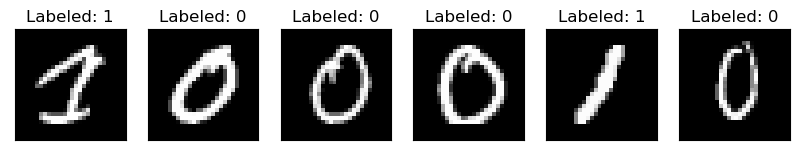

In [ ]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

This code snippet and the resulting plot display a set of images from the MNIST dataset along with their corresponding labels. The MNIST dataset consists of images of handwritten digits (0 through 9), and this visualization helps in understanding what the images look like and their correct classifications.

***Breakdown of the Code***

1. **Setting the Number of Samples (`n_samples_show = 6`):**
   - The variable `n_samples_show` is set to 6, meaning that six images will be displayed.

2. **Creating an Iterator for the Data (`data_iter = iter(train_loader)`):**
   - `train_loader` is presumably a PyTorch DataLoader object that loads batches of images and labels from the MNIST training dataset.
   - `iter(train_loader)` creates an iterator that can be used to loop through the dataset batch by batch.

3. **Setting Up the Plot (`plt.subplots()`):**
   - `plt.subplots()` is used to create a grid of subplots where the images will be displayed. The grid has 1 row and `ncols=n_samples_show` columns (6 columns in this case), with a figure size of `(10, 3)`.

4. **Loop to Display Images and Labels (`while n_samples_show > 0`):**
   - The `while` loop iterates through the dataset, displaying one image and its label per iteration.
   - `images, targets = data_iter.__next__()` fetches the next batch of images and labels.
   - The `imshow` function is used to display the first image of the batch in grayscale (`cmap="gray"`), with the image being squeezed to remove any single-dimensional entries from the shape (ensuring it is displayed correctly).
   - The `set_xticks([])` and `set_yticks([])` methods remove the x and y-axis ticks for a cleaner look.
   - The `set_title()` method sets the title for each subplot, showing the label of the digit (e.g., "Labeled: 1").

5. **Decreasing the Sample Count (`n_samples_show -= 1`):**
   - The variable `n_samples_show` is decremented by 1 with each iteration, controlling the number of images displayed.

***Resulting Plot***

- The plot at the bottom displays 6 images from the MNIST dataset, each corresponding to a different handwritten digit.
- The images are labeled with their correct classifications:
  - The first image is labeled as "1"
  - The second, third, and fifth images are labeled as "0"
  - The fourth image is labeled as "1"
  - The sixth image is labeled as "0"
  
This visualization is commonly used in machine learning to quickly check the correctness of data loading and to get an intuitive sense of the data that the model will be trained on. The correct labels are displayed below each image, helping to ensure that the data is properly labeled before proceeding with training or testing.

### Test Dataset

In [ ]:
n_samples = 50

# Use pre-defined torchvision function to load MNIST test data
X_test = datasets.MNIST(root="./data",
                        train=False,
                        download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(np.where(X_test.targets == 0)[0][:n_samples],
                np.where(X_test.targets == 1)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

In [ ]:
# Define torch dataloader with filtered data
test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=True)

## Step 2: Defining the QNN and Hybrid Model

This second step highlights the powerful capabilities of the `TorchConnector`. Once we have defined our quantum neural network layer—in this instance, an `EstimatorQNN`—we can seamlessly embed it into a layer within our PyTorch `Module`. This is accomplished by initializing a Torch connector using the syntax `TorchConnector(qnn)`, which effectively integrates the quantum layer into the overall PyTorch architecture.

**⚠️ Important Note:**
To ensure proper gradient backpropagation within hybrid quantum-classical models, it is crucial to set the initial parameter `input_gradients` to `TRUE` during the QNN initialization. This step is essential because it allows the gradients to flow correctly through the quantum layer, enabling the model to learn and optimize effectively. Without this setting, the gradient information needed for training may not propagate as expected, potentially leading to suboptimal performance or failure in the learning process. Therefore, always double-check that `input_gradients` is enabled when working with hybrid models that involve both quantum and classical components.

### Define QNN

In [ ]:
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)

    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(circuit=qc,
                       input_params=feature_map.parameters,
                       weight_params=ansatz.parameters,
                       input_gradients=True)

    return qnn

In [ ]:
qnn4 = create_qnn()

### Define Torch NN Module

In [ ]:
class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(1, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256, 64)
        self.fc2 = Linear(64, 2)                    # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)              # Apply torch connector, weights chosen
                                                    # uniformly at random from interval [-1,1].
        self.fc3 = Linear(1, 1)                     # 1-dimensional output from QNN


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)                             # apply QNN
        x = self.fc3(x)

        return cat((x, 1 - x), -1)

In [ ]:
model4 = Net(qnn4)

## Step 3: Training

### Define Optimizer and Loss Function

In [ ]:
optimizer = optim.Adam(model4.parameters(), lr=0.001)
loss_func = NLLLoss()

### Model Training

In [ ]:
epochs = 10                                                     # Set number of epochs
loss_list = []                                                  # Store loss history
model4.train()                                                  # Set model to training mode

for epoch in range(epochs):
    total_loss = []

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)                   # Initialize gradient
        output = model4(data)                                   # Forward pass

        loss = loss_func(output, target)                        # Calculate loss
        loss.backward()                                         # Backward pass
        optimizer.step()                                        # Optimize weights
        total_loss.append(loss.item())                          # Store loss

    loss_list.append(sum(total_loss) / len(total_loss))

    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

Training [10%]	Loss: -0.9191
Training [20%]	Loss: -1.2843
Training [30%]	Loss: -1.4867
Training [40%]	Loss: -1.7842
Training [50%]	Loss: -2.0599
Training [60%]	Loss: -2.2864
Training [70%]	Loss: -2.5351
Training [80%]	Loss: -2.7695
Training [90%]	Loss: -2.9535
Training [100%]	Loss: -3.2152


### Plot the Loss Convergence

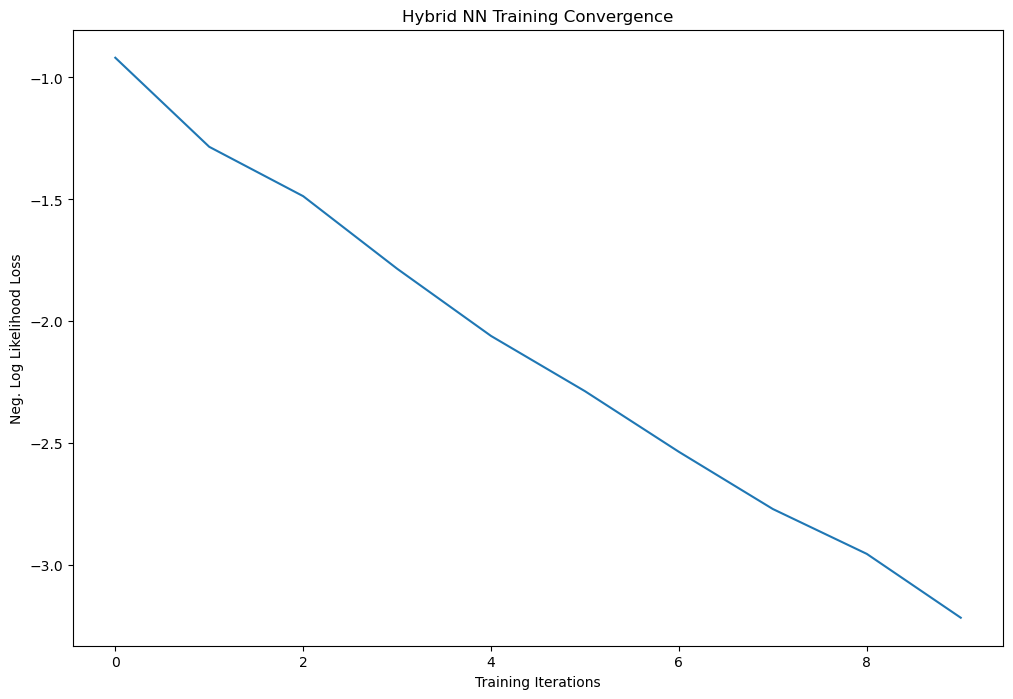

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()

This plot represents the training convergence of a hybrid neural network, specifically showing how the negative log-likelihood loss changes over a series of training iterations.

***Components of the Plot***

1. **X-Axis (Training Iterations):**
   - The x-axis represents the number of training iterations or epochs. Each point along the axis corresponds to a complete pass through the training dataset.

2. **Y-Axis (Neg. Log Likelihood Loss):**
   - The y-axis represents the negative log-likelihood loss, a common loss function used in classification tasks. This loss measures how well the model's predicted probability distribution matches the actual distribution of the data.

3. **Loss Curve (Blue Line):**
   - The blue line shows how the loss decreases over time as the model is trained.
   - The curve indicates that as the number of training iterations increases, the negative log-likelihood loss decreases, which is expected behavior during successful model training.

***Interpretation***

- **Decreasing Loss:** The downward slope of the curve suggests that the model is learning from the training data. As the iterations progress, the model becomes better at predicting the correct outputs, resulting in a lower loss value.
- **Convergence:** The loss appears to decrease steadily, indicating that the model is converging towards an optimal set of parameters. A well-behaved loss curve like this is a good sign that the training process is effective.
- **Performance Monitoring:** This plot is useful for monitoring the training process. A continually decreasing loss indicates that the model is improving, while a flat or increasing loss might suggest problems such as overfitting or an inappropriate learning rate.

Overall, the plot suggests that the hybrid neural network is training effectively, with the loss steadily decreasing across iterations, leading to better performance.

Next, we'll proceed to save the trained hybrid model. This step is essential to demonstrate how a hybrid quantum-classical model, integrated using the `TorchConnector`, can be preserved for future use and reloaded later for inference. When saving and loading hybrid models that utilize the `TorchConnector`, it's important to adhere to PyTorch's standard practices and recommendations for model persistence. By following these guidelines, you can ensure that the model, including its quantum components, is stored accurately and can be effectively restored for continued use in various applications. This capability is particularly valuable in scenarios where the trained model needs to be deployed, shared, or used for additional testing and development without retraining from scratch.

### Save the Hybrid Model

In [ ]:
torch.save(model4.state_dict(), "model4.pt")

## Step 4: Evaluation

We begin by recreating the model and loading its state from the previously saved file. This process involves setting up the Quantum Neural Network (QNN) layer, which can be done using either a different simulator or even real quantum hardware. The flexibility offered by this approach allows you to train a model on real quantum hardware available through cloud services and then switch to using a simulator for inference, or the other way around. This capability is particularly useful for scenarios where you want to leverage the precision of quantum hardware during training but prefer the speed and accessibility of a simulator during inference.

For the sake of simplicity and to maintain consistency with the previous steps, we will create a new quantum neural network in the same manner as before. By doing so, we demonstrate how easy it is to reconstruct the model architecture and load the trained parameters, ensuring that the model can continue from where it left off without any loss in performance. This approach also serves as a reminder of the seamless integration between quantum and classical components, making it straightforward to switch between different computational resources as needed.

In [ ]:
qnn5 = create_qnn()
model5 = Net(qnn5)
model5.load_state_dict(torch.load("model4.pt"))

<All keys matched successfully>

In [ ]:
model5.eval()                                                 # set model to evaluation mode

with no_grad():
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        output = model5(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print("Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
        sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100))

Performance on test data:
	Loss: -3.2453
	Accuracy: 100.0%


### Plot the Predicted Labels

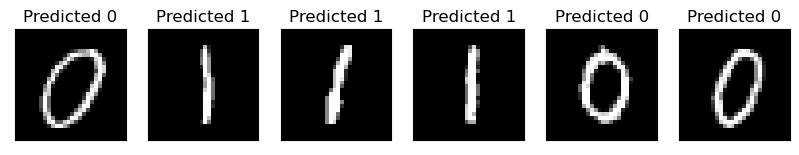

In [ ]:
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model5.eval()

with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model5(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        axes[count].imshow(data[0].numpy().squeeze(), cmap="gray")

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {}".format(pred.item()))

        count += 1

This code snippet and the resulting plot demonstrate the process of making predictions with a trained neural network model on a test dataset, specifically from the MNIST dataset. The goal is to visualize how well the model predicts the labels for handwritten digits.

***Breakdown of the Code***

1. **Set Model to Evaluation Mode (`model5.eval()`):**
   - The `model5.eval()` line sets the model to evaluation mode. In this mode, the model behaves differently compared to training mode (e.g., dropout layers, if any, are disabled, and batch normalization uses running averages instead of batch statistics).

2. **No Gradient Calculation (`with no_grad()`):**
   - The `with torch.no_grad():` block disables gradient computation, which is important during inference to save memory and computational resources. Gradients are not needed during evaluation because the model parameters are not being updated.

3. **Iterate Through Test Data (`for batch_idx, (data, target) in enumerate(test_loader)`):**
   - The loop iterates through batches of test data loaded by `test_loader`. Each batch contains images (`data`) and their corresponding true labels (`target`).

4. **Limiting the Number of Samples (`if count == n_samples_show: break`):**
   - The loop checks if the number of displayed samples has reached the specified limit (`n_samples_show`). If so, it breaks out of the loop.

5. **Model Prediction (`output = model5(data[0:1])`):**
   - The model `model5` makes a prediction on the first image in the batch (`data[0:1]`).
   - If the output's shape is one-dimensional, it is reshaped to match the expected format using `output = output.reshape(1, *output.shape)`.

6. **Determine Predicted Label (`pred = output.argmax(dim=1, keepdim=True)`):**
   - The `argmax(dim=1)` function is used to find the index (or label) with the highest predicted probability, which is the model’s prediction for that image.

7. **Displaying the Image and Prediction (`axes[count].imshow(...)`):**
   - The predicted image is displayed using `imshow` with a grayscale color map (`cmap="gray"`).
   - The title of each subplot is set to show the predicted label using `axes[count].set_title("Predicted {}".format(pred.item()))`.

8. **Increment Count (`count += 1`):**
   - The count is incremented to move to the next image and prediction.

***Resulting Plot***

- The plot displays five images from the MNIST test dataset, each corresponding to a different handwritten digit.
- Each image is labeled with the model's prediction:
  - The first image is predicted as "0"
  - The second and third images are predicted as "1"
  - The fourth image is predicted as "1"
  - The fifth image is predicted as "0"

***Interpretation***

- This plot provides a visual confirmation of the model’s performance on the test data. By comparing the displayed predictions with the actual images, you can assess how accurately the model is identifying the handwritten digits.
- The consistent and correct predictions ("0" for images resembling '0' and "1" for images resembling '1') suggest that the model is performing well in recognizing these digits.

This type of visualization is often used in model evaluation to manually inspect a few predictions and ensure that the model is behaving as expected.

# Conclusion

This project successfully demonstrates the integration of quantum neural networks into classical machine learning workflows using Qiskit's `TorchConnector`. By bridging quantum and classical computing, the project opens up new avenues for developing hybrid models that could leverage the strengths of both paradigms. The hands-on examples provided in the project illustrate how these models can be applied to a variety of tasks, from simple classification and regression to more complex image recognition challenges. While hybrid quantum-classical models are still in the early stages of development, this project shows that they hold significant potential for advancing the field of machine learning, particularly as quantum computing technology continues to evolve. Future work could focus on optimizing these models, exploring different quantum algorithms, and applying them to a broader range of real-world problems.